In [27]:
from itertools import product
import logging
import os
import sys
from matplotlib import pyplot as plt
from mapclassify import Quantiles, EqualInterval, FisherJenks
import numpy as np
import pandas as pd
from pysal.lib import weights
from pysal.explore import esda
from pysal.viz.splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
os.chdir('..')
sys.path.append(os.getcwd())

In [3]:
%matplotlib inline

In [4]:
from src.load_covid_data_funcs import load_data_with_shp, load_all_data_with_shp
from src.visualize_funcs import plot_scheme, create_gif

In [100]:
prv = load_all_data_with_shp()

In [101]:
prv.data.max()

Timestamp('2020-04-19 00:00:00')

In [102]:
var = 'totale_casi_PERC_POP_TOT'
last_data = prv.loc[(prv.data==prv.data.max()) & ~(prv.totale_casi.isna())]

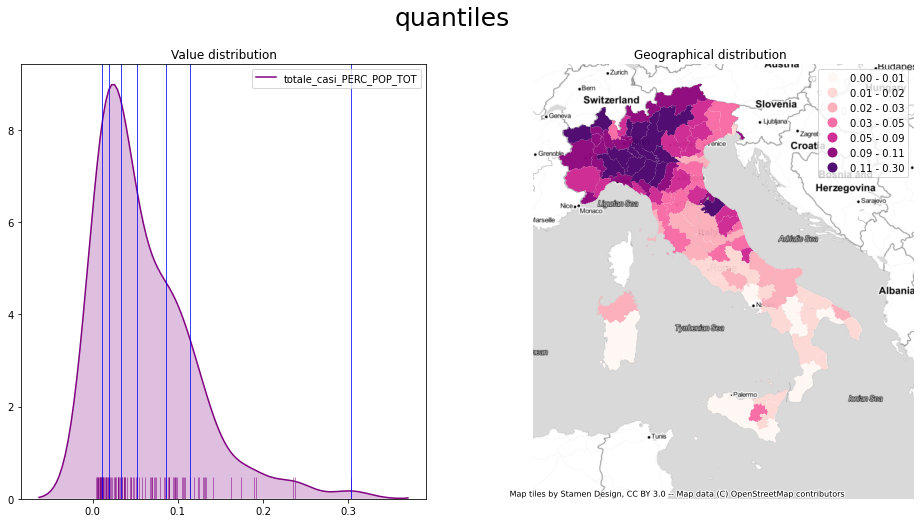

In [103]:
plot_scheme(scheme='quantiles',var=var,db=last_data.to_crs(epsg=3857),k=7)


In [104]:
w_queen = weights.Queen.from_dataframe(last_data.reset_index(), idVariable="prov_acr")

In [105]:
w_knn = weights.KNN.from_dataframe(last_data.reset_index(),ids='prov_acr', k=8)

In [106]:
w_fuzz = weights.fuzzy_contiguity(last_data.reset_index())

In [107]:
w = w_knn
w.transform = 'R'

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2094d2f5e08>)

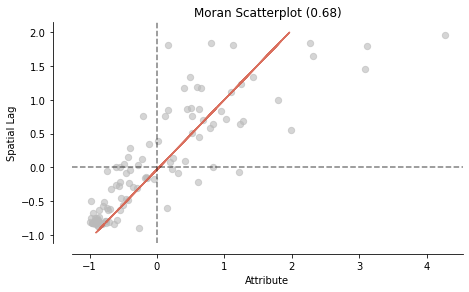

In [108]:
mi_tot = esda.Moran(last_data[var], w)
moran_scatterplot(mi_tot)

(<Figure size 1080x288 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002094D9B0648>,
       dtype=object))

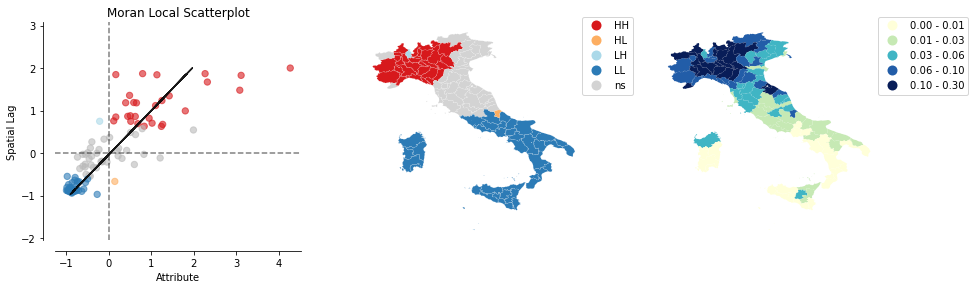

In [109]:
lisa = esda.Moran_Local(last_data[var], w)
plot_local_autocorrelation(lisa, last_data, var)